In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
import visualkeras

2024-10-21 10:54:10.111465: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-21 10:54:10.120944: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-21 10:54:10.206992: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-21 10:54:10.289048: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-21 10:54:10.365042: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
(x_train, y_train), (x_test, M_y_test) = keras.datasets.fashion_mnist.load_data()

M_x_train = x_train.astype("float32") / 255.0
M_x_test = x_test.astype("float32") / 255.0

# Розширення розмірності для згорткових шарів
M_x_train = np.expand_dims(x_train, -1)
M_x_test = np.expand_dims(x_test, -1)

# Розділення на тренувальний та валідаційний набори
val_size = 10000
M_x_val = x_train[-val_size:]
M_y_val = y_train[-val_size:]
M_x_train = x_train[:-val_size]
M_y_train = y_train[:-val_size]

In [3]:
(x_train, y_train), (x_test, C_y_test) = keras.datasets.cifar10.load_data()

C_x_train = x_train.astype("float32") / 255.0
C_x_test = x_test.astype("float32") / 255.0

val_size = 10000
C_x_val = C_x_train[-val_size:]
C_y_val = y_train[-val_size:]
C_x_train = C_x_train[:-val_size]
C_y_train = y_train[:-val_size]

In [4]:
M_x_train.shape, C_x_train.shape

((50000, 28, 28), (40000, 32, 32, 3))

In [5]:
M_class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
C_class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
def train_model(model, epochs=50, batch_size=256, x_train=M_x_train, y_train=M_y_train, x_val=M_x_val, y_val=M_y_val):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, 
                        validation_data=(x_val, y_val),
                        epochs=epochs, 
                        batch_size=batch_size)
    return history

def plot_learning_curve(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

def print_classification_report(model, x, y, class_names=M_class_names):
    y_pred = model.predict(x)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(classification_report(y, y_pred_classes, target_names=class_names))

def classify_random_samples(model, x, y, num_samples=20, class_names=None, dataset='mnist'):
    if class_names is None:
        raise ValueError("class_names must be provided")

    indices = np.random.choice(len(x), num_samples, replace=False)
    x_samples = x[indices]
    y_samples = y[indices]
    
    y_pred = model.predict(x_samples)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    fig, axes = plt.subplots(4, 5, figsize=(15, 12))
    for i, ax in enumerate(axes.flat):
        if i < num_samples:
            if dataset == 'mnist':
                ax.imshow(x_samples[i].reshape(28, 28), cmap='gray')
            elif dataset == 'cifar10':
                ax.imshow(x_samples[i])
            
            true_label = class_names[y_samples[i].item()]  # Use .item() to convert to scalar
            pred_label = class_names[y_pred_classes[i]]
            color = 'green' if true_label == pred_label else 'red'
            ax.set_title(f"True: {true_label}\nPred: {pred_label}", color=color)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [8]:
def create_model_1():
    model = keras.Sequential([
        layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(16, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(16, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [9]:
model_1 = create_model_1()
history_1 = train_model(model_1)

Epoch 1/50


/home/suphomie/uni/homeworks-labs/deep-learning-tools/lab-4/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3151 - loss: 3.1786 - val_accuracy: 0.5289 - val_loss: 1.3672
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5586 - loss: 1.2480 - val_accuracy: 0.5812 - val_loss: 1.1467
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6115 - loss: 1.0631 - val_accuracy: 0.6355 - val_loss: 0.9844
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6571 - loss: 0.9203 - val_accuracy: 0.6675 - val_loss: 0.8604
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7381 - loss: 0.7690 - val_accuracy: 0.7733 - val_loss: 0.7247
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7902 - loss: 0.6574 - val_accuracy: 0.7865 - val_loss: 0.6040
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8003 - loss: 0.5469 - val_accuracy: 0.8196 - val_loss: 0.5035
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8450 - loss: 0.4401 - val_accuracy: 0.8505 - val_

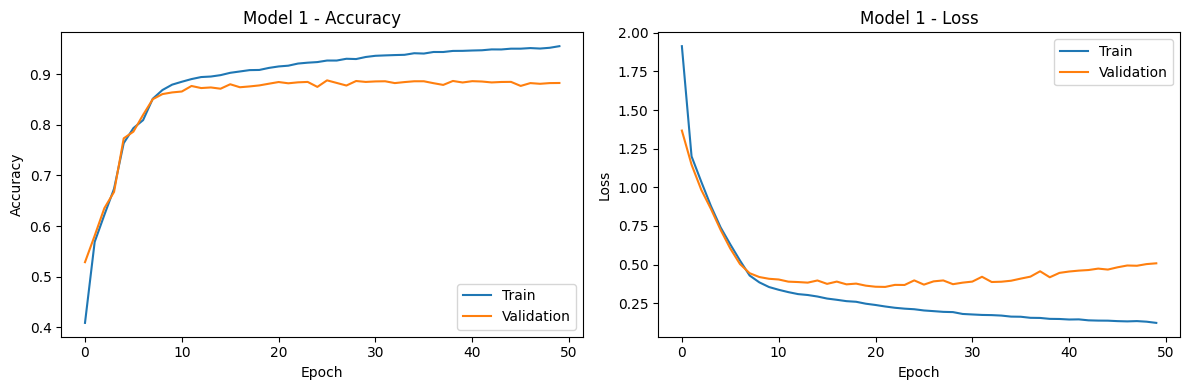

In [10]:
plot_learning_curve(history_1, 'Model 1')

In [11]:
print("Model 1 Classification Report:")
print_classification_report(model_1, M_x_test, M_y_test)

Model 1 Classification Report:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.81      0.81      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.82      0.82      0.82      1000
       Dress       0.86      0.88      0.87      1000
        Coat       0.82      0.81      0.81      1000
      Sandal       0.96      0.96      0.96      1000
       Shirt       0.68      0.68      0.68      1000
     Sneaker       0.94      0.95      0.94      1000
         Bag       0.97      0.94      0.96      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Model 1 Random Sample Classification:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


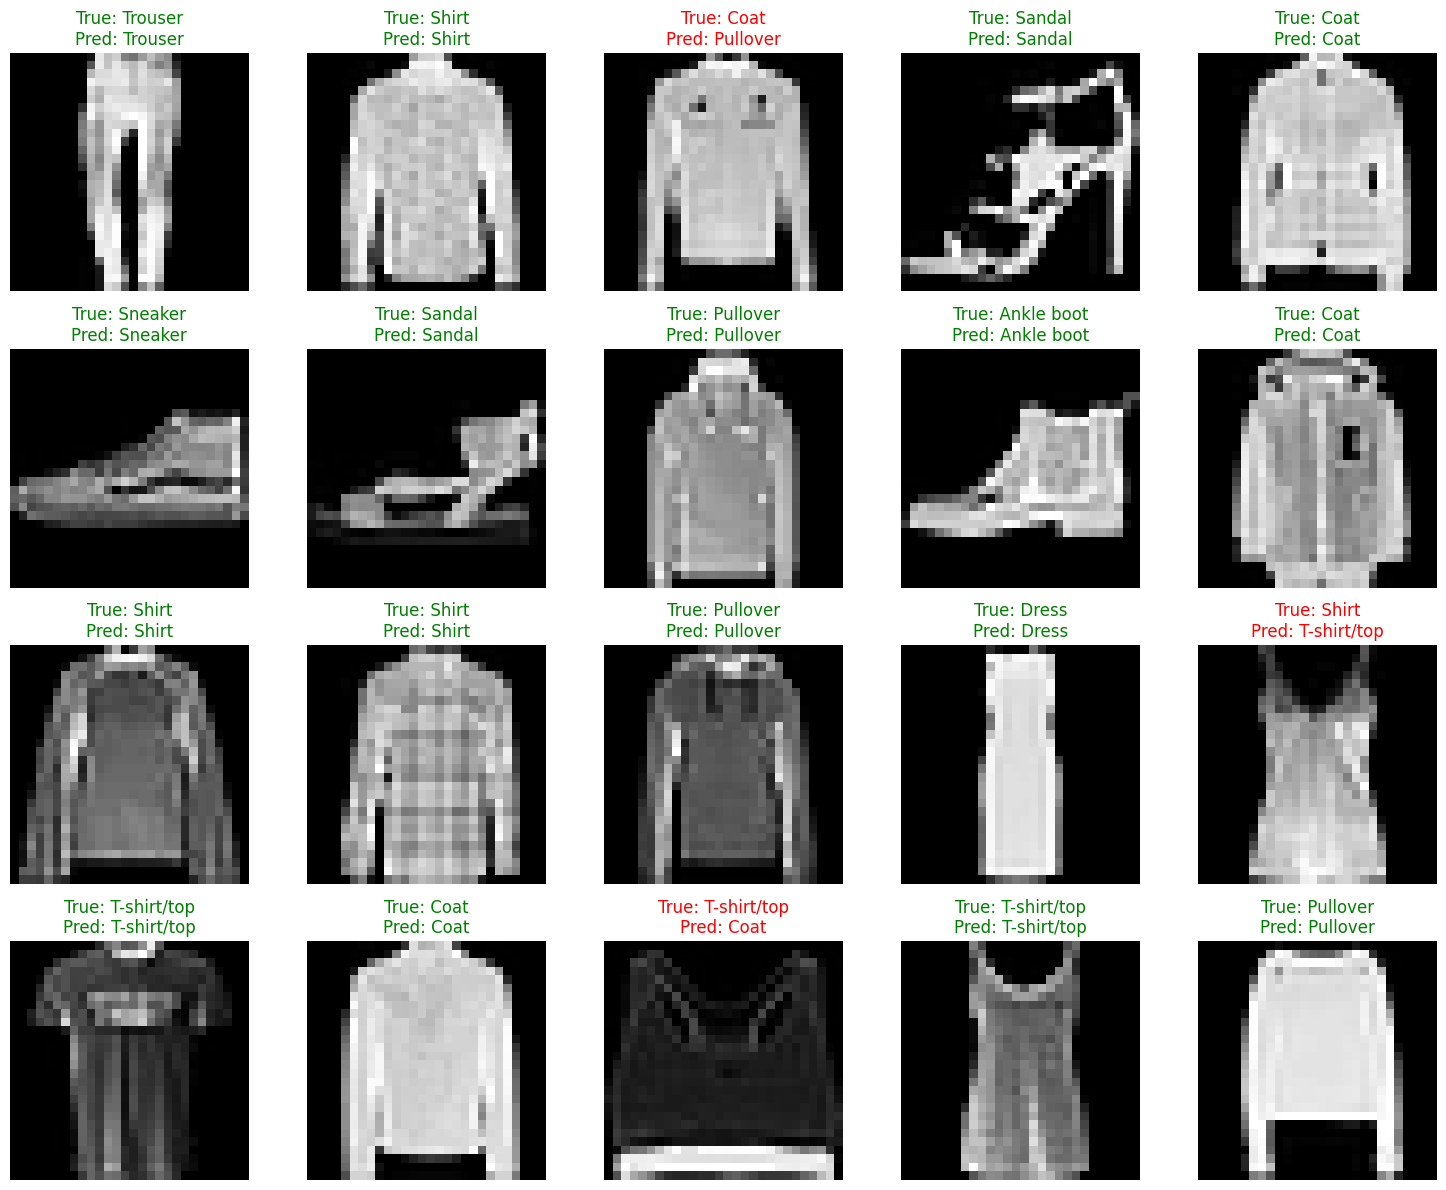

In [12]:
print("Model 1 Random Sample Classification:")
classify_random_samples(model_1, M_x_test, M_y_test, class_names=M_class_names)

In [13]:
def create_model_cifar10():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [14]:
cifar_model = create_model_cifar10()
cifar_hist = train_model(cifar_model, x_train=C_x_train, y_train=C_y_train, x_val=C_x_val, y_val=C_y_val)

/home/suphomie/uni/homeworks-labs/deep-learning-tools/lab-4/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.2859 - loss: 1.9494 - val_accuracy: 0.4513 - val_loss: 1.5242
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - accuracy: 0.4807 - loss: 1.4427 - val_accuracy: 0.5337 - val_loss: 1.3175
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.5460 - loss: 1.2654 - val_accuracy: 0.5685 - val_loss: 1.2363
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 105ms/step - accuracy: 0.5908 - loss: 1.1514 - val_accuracy: 0.6009 - val_loss: 1.1244
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - accuracy: 0.6216 - loss: 1.0687 - val_accuracy: 0.6226 - val_loss: 1.0699
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - accuracy: 0.6545 - loss: 0.9968 - val_accuracy: 0.6350 - val_loss: 1.0482
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - accuracy: 0.6741 - loss: 0.9325 - val_accuracy: 0.6446 - val_loss: 1.0219
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 104ms/step - accuracy: 0.6951 - loss: 0.86

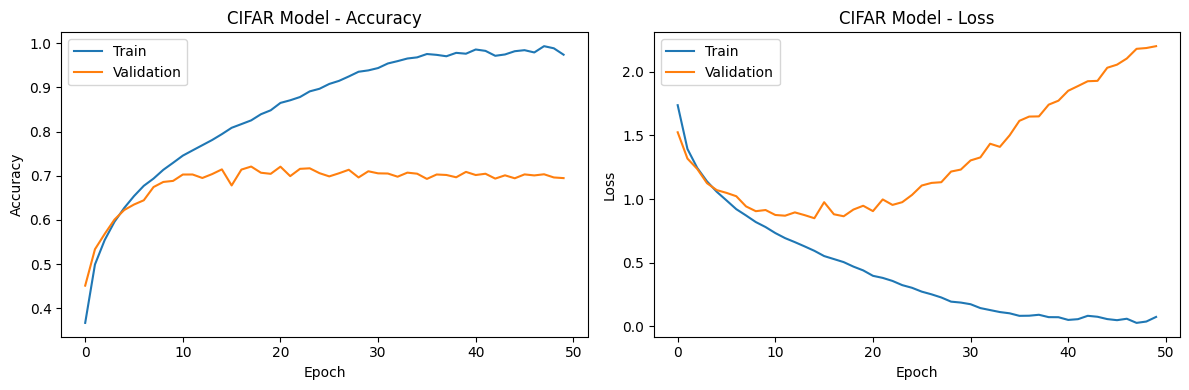

In [15]:
plot_learning_curve(cifar_hist, 'CIFAR Model')

In [16]:
print("CIFAR Model Classification Report:")
print_classification_report(cifar_model, C_x_test, C_y_test, class_names=C_class_names)

CIFAR Model Classification Report:
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
              precision    recall  f1-score   support

    airplane       0.76      0.70      0.73      1000
  automobile       0.73      0.85      0.79      1000
        bird       0.59      0.62      0.60      1000
         cat       0.50      0.51      0.51      1000
        deer       0.65      0.63      0.64      1000
         dog       0.61      0.58      0.59      1000
        frog       0.68      0.82      0.74      1000
       horse       0.79      0.69      0.73      1000
        ship       0.81      0.79      0.80      1000
       truck       0.81      0.71      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



CIFAR Model Random Sample Classification:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


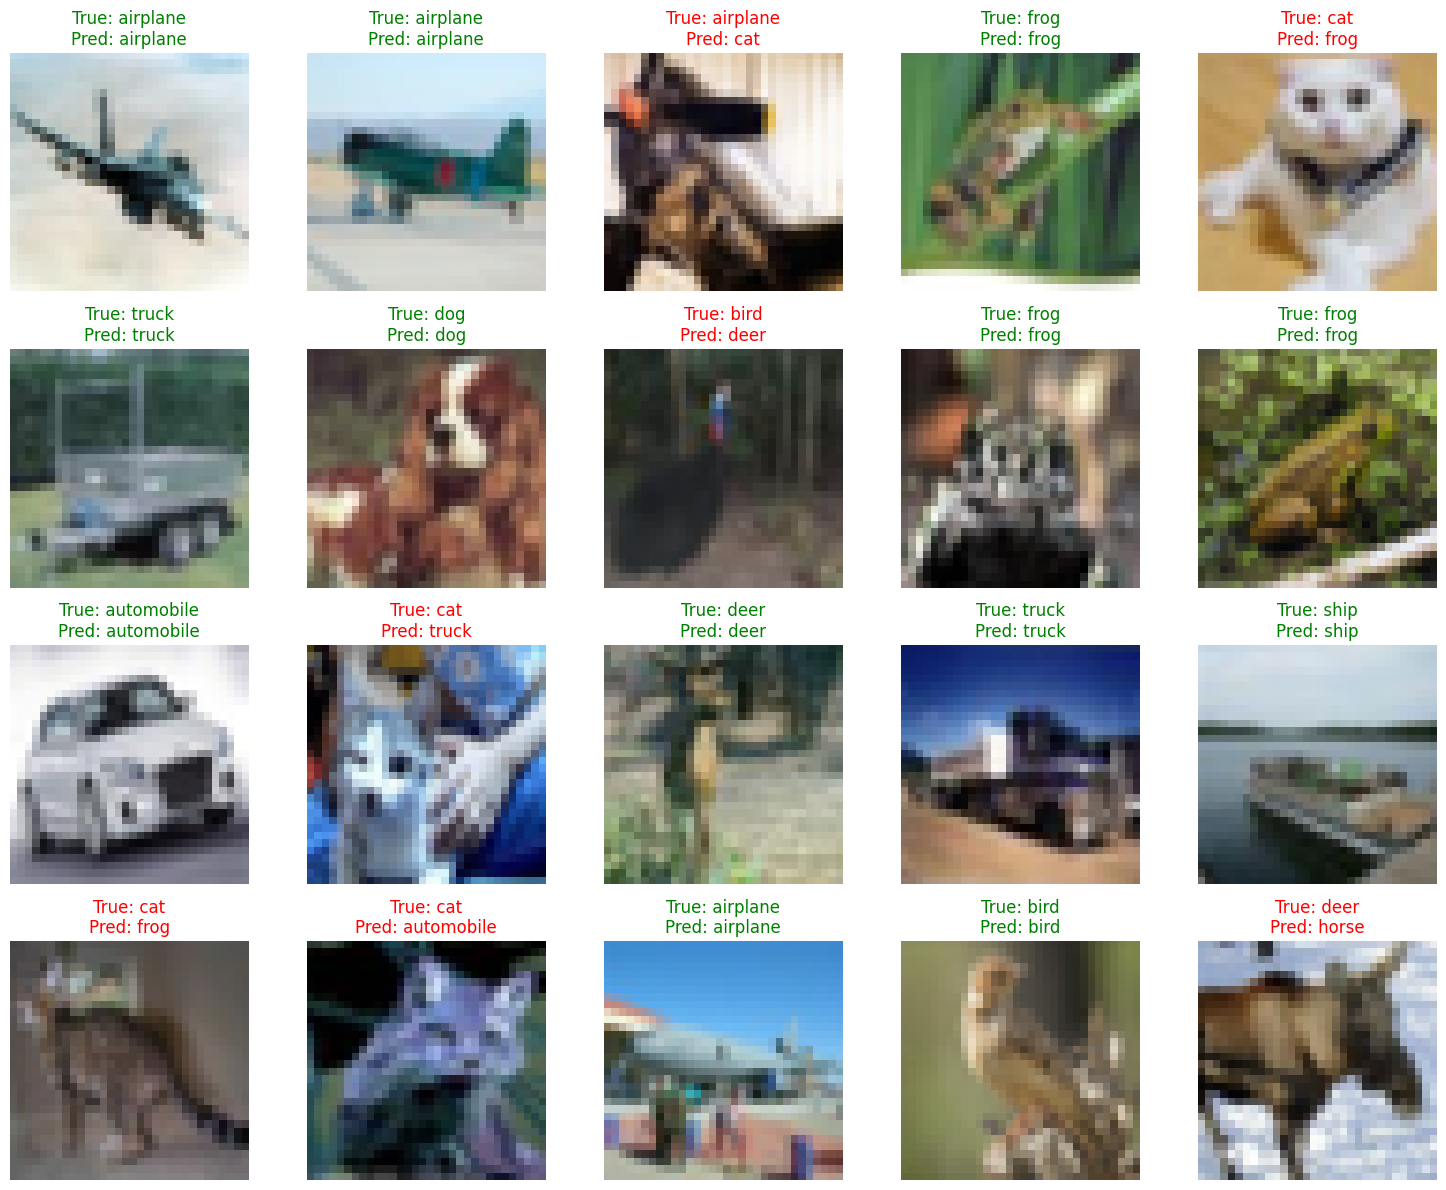

In [17]:
print("CIFAR Model Random Sample Classification:")
classify_random_samples(cifar_model, C_x_test, C_y_test, class_names=C_class_names, dataset='cifar10')

In [18]:
base_model = create_model_cifar10()
base_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

def create_transfer_mnist_model(base_model):
    for layer in base_model.layers[:-1]:
        layer.trainable = False
    
    model = keras.Sequential([
        layers.InputLayer(input_shape=(28, 28, 1)),
        layers.Resizing(32, 32),  # Змінюємо розмір вхідних даних
        layers.Rescaling(1./255),
        layers.Conv2D(32, 3, activation='relu'),
        base_model.layers[1],  # MaxPooling2D
        base_model.layers[2],  # Conv2D
        base_model.layers[3],  # MaxPooling2D
        base_model.layers[4],  # Conv2D
        base_model.layers[5],  # Flatten
        base_model.layers[6],  # Dense
        layers.Dense(10, activation='softmax')  # Новий вихідний шар для 10 класів Fashion MNIST
    ])
    return model

/home/suphomie/uni/homeworks-labs/deep-learning-tools/lab-4/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
transfer_mnist_model = create_transfer_mnist_model(base_model)
transfer_mnist_hist = train_model(transfer_mnist_model)

/home/suphomie/uni/homeworks-labs/deep-learning-tools/lab-4/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.2521 - loss: 2.1505 - val_accuracy: 0.6650 - val_loss: 1.2945
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.6888 - loss: 1.1303 - val_accuracy: 0.7215 - val_loss: 0.8541
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.7208 - loss: 0.8254 - val_accuracy: 0.7363 - val_loss: 0.7480
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.7411 - loss: 0.7395 - val_accuracy: 0.7498 - val_loss: 0.6929
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.7516 - loss: 0.6904 - val_accuracy: 0.7597 - val_loss: 0.6601
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - accuracy: 0.7587 - loss: 0.6588 - val_accuracy: 0.7666 - val_loss: 0.6360
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 85ms/step - accuracy: 0.7714 - loss: 0.6278 - val_accuracy: 0.7666 - val_loss: 0.6210
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.7755 - loss: 0.6106 - 

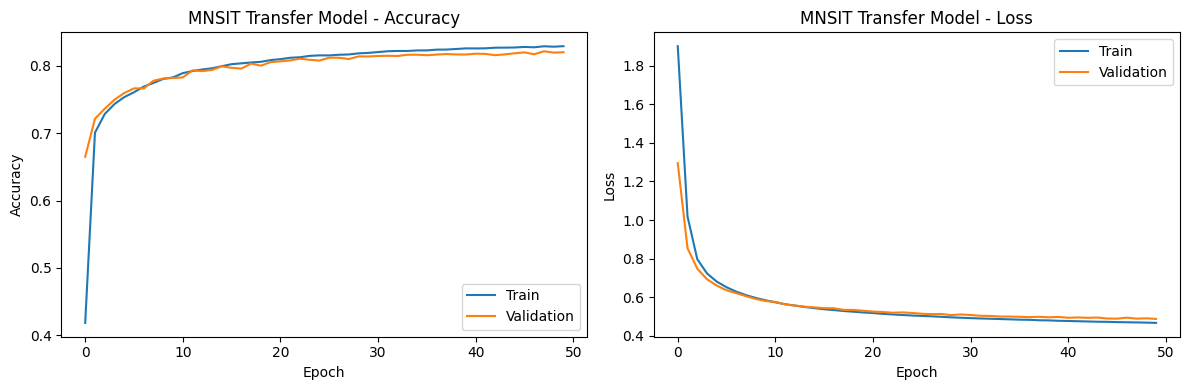

In [20]:
plot_learning_curve(transfer_mnist_hist, 'MNIST Transfer CIFAR Model')

MNSIT Transfer Model Random Sample Classification:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


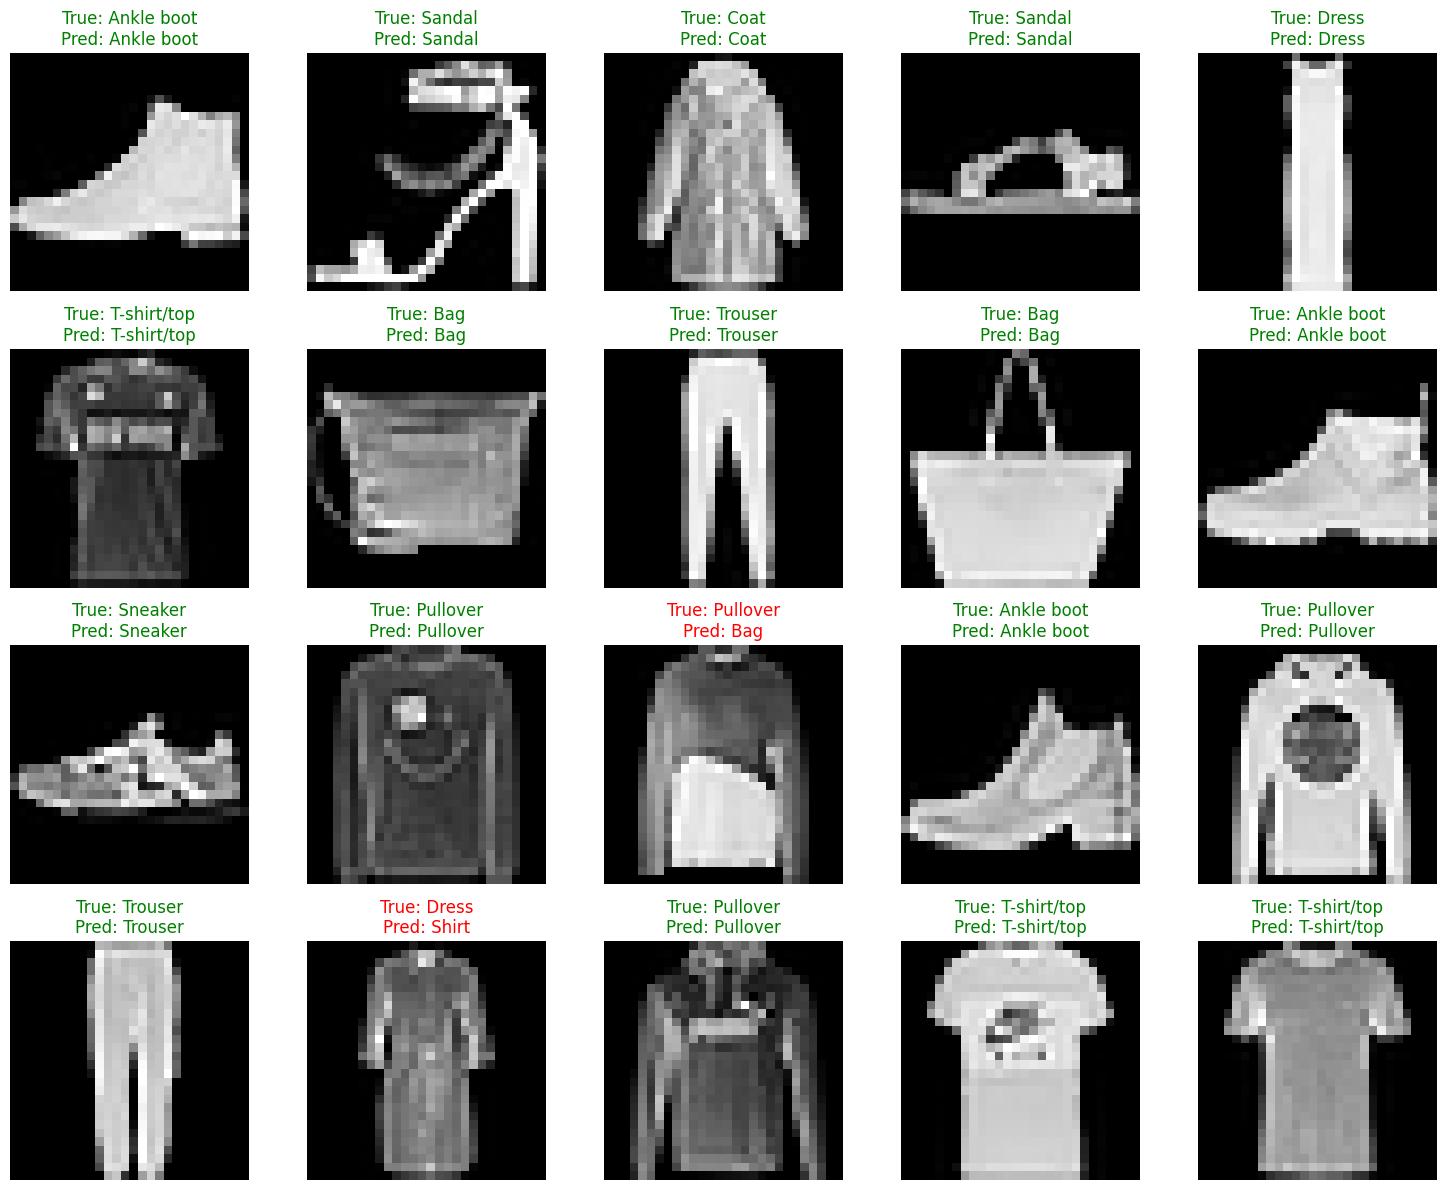

In [21]:
print("MNSIT Transfer Model Random Sample Classification:")
classify_random_samples(transfer_mnist_model, M_x_test, M_y_test, class_names=M_class_names)

In [28]:
mobile_base_model = keras.applications.MobileNetV2(input_shape=(32, 32, 3), include_top=False, weights='imagenet')
base_model.trainable = False

def create_new_mnist_model():
    model = keras.Sequential([
        mobile_base_model,
        layers.Flatten(),                      # Перетворюємо виходи згорткової мережі в одномірний масив
        layers.Dense(128, activation='relu'),  # Повнозв'язний шар
        layers.Dropout(0.5),                   # Dropout для запобігання перенавчанню
        layers.Dense(10, activation='softmax') # Вихідний шар для 10 класів Fashion MNIST
    ])
    return model

new_mnist_model = create_new_mnist_model()
new_mnist_hist = train_model(new_mnist_model)

/tmp/ipykernel_106450/2355027778.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobile_base_model = keras.applications.MobileNetV2(input_shape=(32, 32, 3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/50


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_5_1/Cast:0", shape=(None, 28, 28), dtype=float32). Expected shape (None, 32, 32, 3), but input has incompatible shape (None, 28, 28)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 28, 28), dtype=uint8)
  • training=True
  • mask=None

In [ ]:
plot_learning_curve(new_mnist_hist, 'MNIST Transfer Mobile Model')

In [ ]:
print("MNIST Transfer Mobile Model Classification Report:")
print_classification_report(new_mnist_model, M_x_test, M_y_test)

In [ ]:
print("MNIST Transfer Mobile Model Random Sample Classification:")
classify_random_samples(new_mnist_model, M_x_test, M_y_test, class_names=M_class_names)